# Insight of Datasets

In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

## HighD dataset

### Match data files to maps

According to meta records:

- track files 01-03 are recorded in location 2 (denote map as highD_1).
- track files 04-06 are recorded in location 3 (denote as highD_2).
- track files 07-10 are recorded in location 4 (denote as highD_3).
- track files 11-14, 25-57 are recorded in location 1 (denote as highD_4).
- track files 15-24 are recorded in location 5 (denote as highD_5).
- track files 58-60 are recorded in location 6 (denote as highD_6).

In [2]:
highD_folder = "/data/HighD/highD/data"
highD_column = {"x": "x", "y": "y", "id": "id"}
highD_vehicle = ["Car", "Truck"]

In [3]:
maps = defaultdict(list)
for i in range(60):
    df = pd.read_csv(os.path.join(highD_folder, format(i+1, "02d")+"_recordingMeta.csv"))
    maps[df.iloc[0]["locationId"]].append(i+1)
for key, value in maps.items():
    print(key, value)

2 [1, 2, 3]
3 [4, 5, 6]
4 [7, 8, 9, 10]
1 [11, 12, 13, 14, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
5 [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
6 [58, 59, 60]


### Visualization

The trajectories are visualized to obtain a rough idea about the coordination information about the roads and the nodes.

In [4]:
def visualize_trajectory(folder_path, column_name, index, vtype, centralize=False):
    colors = ["salmon", "lightgreen", "chocolate", "turquoise", "orange", "deepskyblue", "gold", "cornflowerblue", "mediumslateblue", "hotpink"]
    for id in index:
        df = pd.read_csv(os.path.join(folder_path, format(id, "02d")+"_tracks.csv"))
        df_meta = pd.read_csv(os.path.join(folder_path, format(id, "02d")+"_tracksMeta.csv"))
        ids = []
        for _, line in df_meta.iterrows():
            if line["class"] in vtype:
                ids.append(line[column_name["id"]])
        xCenter = []
        yCenter = []
        for _, line in df.iterrows():
            if line[column_name["id"]] in ids:
                x = line[column_name["x"]]
                y = line[column_name["y"]]
                if centralize:
                    x += line["width"] / 2
                    y += line["height"] / 2
                xCenter.append(x)
                yCenter.append(y)        
        plt.scatter(xCenter, yCenter, s=0.01, c=colors[id % 10])
    plt.show()

#### HighD_1 (location 2)

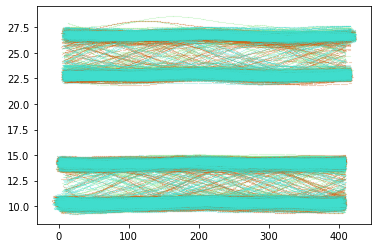

In [5]:
track_ids_g1 = [1,2,3]
visualize_trajectory(highD_folder, highD_column , track_ids_g1, highD_vehicle, centralize=True)

#### HighD_2 (location 3)

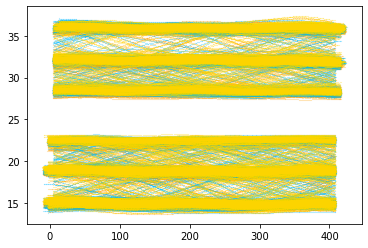

In [6]:
track_ids_g2 = [4,5,6]
visualize_trajectory(highD_folder, highD_column, track_ids_g2, highD_vehicle, centralize=True)

#### HighD_3 (location 4)

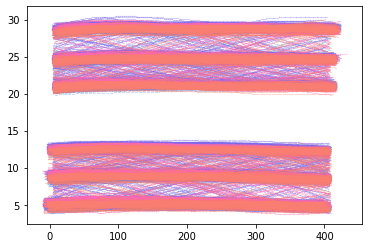

In [7]:
track_ids_g3 = [7,8,9,10]
visualize_trajectory(highD_folder, highD_column, track_ids_g3, highD_vehicle, centralize=True)

#### HighD_4 (location 1)

The data for map highD_4 is tricky. By careful observation, track files 11-14, 25-57 are for the same map, but the y-axes are not calibrated. This problem will be handled later.

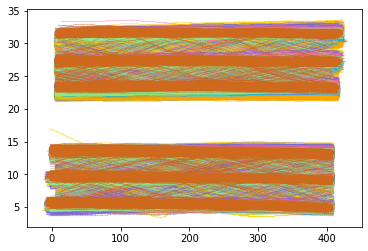

In [8]:
track_ids_g4_0 = [11,26,27,28,29,30,31,32,33,34,35,36,46,47,48,49,51,52]
visualize_trajectory(highD_folder, highD_column, track_ids_g4_0, highD_vehicle, centralize=True)

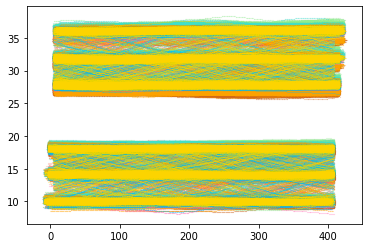

In [9]:
track_ids_g4_1 = [12,14,39,40,41,53,54,55,56]
visualize_trajectory(highD_folder, highD_column, track_ids_g4_1, highD_vehicle, centralize=True)

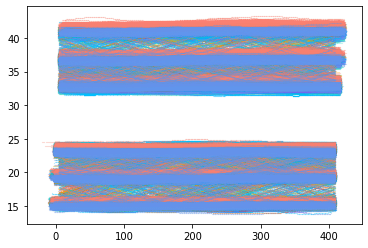

In [10]:
track_ids_g4_2 = [13,25,37,38,42,43,44,45,50,57]
visualize_trajectory(highD_folder, highD_column, track_ids_g4_2, highD_vehicle, centralize=True)

#### highD_5 (location 5)

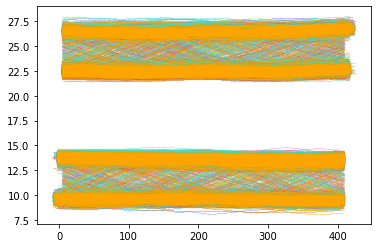

In [11]:
track_ids_g5 = [15,16,17,18,19,20,21,22,23,24]
visualize_trajectory(highD_folder, highD_column, track_ids_g5, highD_vehicle, centralize=True)

#### HighD_6 (location 6)

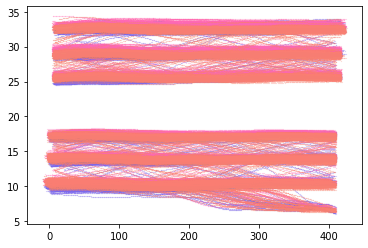

In [12]:
track_ids_g6 = [58,59,60]
visualize_trajectory(highD_folder, highD_column, track_ids_g6, highD_vehicle, centralize=True)

## Estimate Road Boundaries

### Estimate Nodes in X-axis

The start point and end point of the roads are decided by the average start points and end points of the **complete trajectories**. The average start point and end points is around [0, 410] regardless the change of the threshold to filter incomplete trajectories, which is slightly smaller than the range (420m) declared by the dataset.

In [13]:
def check_completeness(xCenters, thresholds=[5,405]):
    if min(xCenters) > thresholds[0] or max(xCenters) < thresholds[1]:
        return False
    return True

def find_xRange(folder_path, index):
    start_points = []
    end_points=[]
    for id in index:
        df = pd.read_csv(os.path.join(folder_path, format(id, "02d")+"_tracks.csv"))
        trajectory_ids = df["id"].unique()
        for traj_id in trajectory_ids:
            sub_df = df[df["id"] == traj_id]
            xCenter = np.array(sub_df["x"]) + np.array(sub_df["width"])/2
            if check_completeness(xCenter):
                start_points.append(min(xCenter))
                end_points.append(max(xCenter))
    print("Start point (min, average, median, max): %f, %f, %f, %f" % (min(start_points), np.mean(start_points), np.median(start_points), max(start_points)))
    print("End point (min, average, median, max): %f, %f, %f, %f" % (min(end_points), np.mean(end_points), np.median(end_points), max(end_points)))
    

In [14]:
find_xRange(highD_folder, track_ids_g1)

Start point (min, average, median, max): -4.365000, 1.669808, 1.815000, 5.000000
End point (min, average, median, max): 405.000000, 408.069801, 407.990000, 416.955000


In [15]:
find_xRange(highD_folder, track_ids_g2)

Start point (min, average, median, max): -5.805000, 0.791958, -1.435000, 5.000000
End point (min, average, median, max): 405.025000, 409.416227, 408.055000, 417.015000


In [16]:
find_xRange(highD_folder, track_ids_g3)

Start point (min, average, median, max): -5.045000, 1.519626, 3.900000, 5.000000
End point (min, average, median, max): 405.000000, 409.026474, 407.920000, 417.615000


In [17]:
track_ids_g4 = track_ids_g4_0 + track_ids_g4_1 + track_ids_g4_2
find_xRange(highD_folder, track_ids_g4)

Start point (min, average, median, max): -19.885000, 0.521675, -0.955000, 5.000000
End point (min, average, median, max): 405.000000, 409.942997, 408.445000, 419.175000


In [18]:
find_xRange(highD_folder, track_ids_g5)

Start point (min, average, median, max): -6.100000, 1.051724, -0.717500, 5.000000
End point (min, average, median, max): 405.000000, 410.774473, 408.755000, 420.860000


In [19]:
find_xRange(highD_folder, track_ids_g6)

Start point (min, average, median, max): -6.260000, 1.206106, 0.935000, 4.995000
End point (min, average, median, max): 405.050000, 409.495332, 408.990000, 417.645000


Especially, we need to find the xRange of lane 2 in highD_6

In [20]:
start_points = []
for id in track_ids_g6:
    df = pd.read_csv(os.path.join(highD_folder, format(id, "02d")+"_tracks.csv"))
    sub_df = df[df["laneId"]==2]
    xCenter = np.array(sub_df["x"]) + np.array(sub_df["width"])/2
    temp = min(xCenter)
    if temp > 150:
        start_points.append(temp)
print("Start point (min, average, median, max): %f, %f, %f, %f" % (min(start_points), np.mean(start_points), np.median(start_points), max(start_points)))

Start point (min, average, median, max): 176.420000, 176.420000, 176.420000, 176.420000


### Estimate Boundaries in Y-axis

The global coordinate system of HighD is different from InD and RounD. **The origin of the coordinate system is in the upper-left corner.** In this repository, the origin coordinate system will later be converted to the lower-left corner (see ```highD_preprocess.py```). For now, we need to figure out the road width and road boundaries in the original coordinate system based on the recordingMeta files.

In [21]:
def find_boundaries(folder_path, index):
    centers = defaultdict(list)
    lowers = defaultdict(list)
    uppers = defaultdict(list)
    sizes = defaultdict(list)
    lane_ids = []
    for id in index:
        df = pd.read_csv(os.path.join(folder_path, format(id, "02d")+"_tracks.csv"))
        lane_ids = df["laneId"].unique()
        for lane_id in lane_ids:
            df_sub = df[df["laneId"] == lane_id]
            yCenter = np.array(df_sub["y"]) + np.array(df_sub["height"]) / 2
            y_upper = np.array(df_sub["y"]) + np.array(df_sub["height"])
            centers[lane_id].append(np.mean(yCenter))
            uppers[lane_id].append(max(y_upper))
            lowers[lane_id].append(min(df_sub["y"].tolist()))
            sizes[lane_id].append(len(y_upper))
    lane_ids.sort()
    for lane_id in lane_ids:
        center = np.sum(np.array(centers[lane_id])*np.array(sizes[lane_id])) / sum(sizes[lane_id])
        print("lane %d: center=%.2f, upper bound=%f, lower bound=%f" % (lane_id, center, max(uppers[lane_id]), min(lowers[lane_id])))

#### HighD_1 (location 2)

road width $\approx$ 4.0

Road boundaries under the upper-left-origin coordinate system:
- lane 2: [8.5, 12.5]
- lane 3: [12.5, 16.5]
- lane 5: [21.0, 25.0]
- lane 6: [25.0, 29.0]

Road boundaries under the upper-right-origin coordinate system $(50-y)$:
- lane 2: [37.5, 41.5]
- lane 3: [**33.5**, 37.5]
- lane 5: [25.0, **29.0**]
- lane 6: [21.0, 25.0]

If we take the width of cars into consideration, we will find the some vehicles cross the boundary of the roads. That is because in the real world, the road has sideways.

In [22]:
find_boundaries(highD_folder, track_ids_g1)

lane 2: center=10.36, upper bound=13.940000, lower bound=7.950000
lane 3: center=14.19, upper bound=16.080000, lower bound=11.050000
lane 5: center=22.90, upper bound=26.260000, lower bound=20.890000
lane 6: center=26.62, upper bound=29.710000, lower bound=23.630000


#### HighD_2 (location 3)

road width $\approx$ 3.75

Road boundaries under the upper-left-origin coordinate system:
- lane 2: [13.15, 16.90]
- lane 3: [16.90, 20.65]
- lane 4: [20.65, 24.40]
- lane 6: [26.35, 30.10]
- lane 7: [30.10, 33.85]
- lane 8: [33.85, 37.60]

Road boundaries under the upper-right-origin coordinate system $(50-y)$:
- lane 2: [33.10, 36.85]
- lane 3: [29.35, 33.10]
- lane 4: [**25.60**, 29.35]
- lane 6: [19.90, **23.65**]
- lane 7: [16.15, 19.90]
- lane 8: [12.40, 16.15]

In [23]:
find_boundaries(highD_folder, track_ids_g2)

lane 2: center=14.96, upper bound=18.640000, lower bound=12.440000
lane 3: center=18.82, upper bound=22.280000, lower bound=15.570000
lane 4: center=22.33, upper bound=24.340000, lower bound=19.310000
lane 6: center=28.49, upper bound=31.460000, lower bound=26.330000
lane 7: center=31.98, upper bound=35.340000, lower bound=28.740000
lane 8: center=35.89, upper bound=38.470000, lower bound=32.350000


#### HighD_3 (location 4)

road width $\approx$ 3.75

Road boundaries under the upper-left-origin coordinate system:
- lane 2: [3.50, 7.25]
- lane 3: [7.25, 11.00]
- lane 4: [11.00, 14.75]
- lane 6: [19.35, 23.10]
- lane 7: [23.10, 26.85]
- lane 8: [26.85, 30.60]

Road boundaries under the upper-right-origin coordinate system $(50-y)$:
- lane 2: [42.75, 46.50]
- lane 3: [39.00, 42.75]
- lane 4: [**35.25**, 39.00]
- lane 6: [26.90, **30.65**]
- lane 7: [23.15, 26.90]
- lane 8: [19.40, 23.15]

In [24]:
find_boundaries(highD_folder, track_ids_g3)

lane 2: center=5.16, upper bound=8.880000, lower bound=2.530000
lane 3: center=8.94, upper bound=12.420000, lower bound=5.770000
lane 4: center=12.57, upper bound=14.750000, lower bound=9.470000
lane 6: center=21.28, upper bound=24.440000, lower bound=18.830000
lane 7: center=24.83, upper bound=28.330000, lower bound=21.670000
lane 8: center=28.89, upper bound=31.700000, lower bound=25.240000


#### HighD_4 (location 1)

road width $\approx$ 3.86

HighD_4 is a strange map, whose road widths are not strictly following the [Autobahn](https://en.wikipedia.org/wiki/Autobahn) routine.

Road boundaries under the upper-left-origin coordinate system:

- lane 2: [3.64, 7.50]
- lane 3: [7.50, 11.36]
- lane 4: [11.36, 15.22]
- lane 6: [20.88, 24.74]
- lane 7: [24.74, 28.60]
- lane 8: [28.60, 32.46]


Road boundaries under the upper-right-origin coordinate system $(50-y)$:

- lane 2: [42.50, 46.36]
- lane 3: [38.64, 42.50]
- lane 4: [**34.78**, 38.64]
- lane 6: [25.26, **29.12**]
- lane 7: [21.40, 25.26]
- lane 8: [17.54, 21.40]

#### HighD_5 (location 5)

road width $\approx$ 4

Road boundaries under the upper-left-origin coordinate system:
- lane 2: [7.7, 11.7]
- lane 3: [11.7, 15.7]
- lane 5: [20.5, 24.5]
- lane 6: [24.5, 28.5]

Road boundaries under the upper-right-origin coordinate system $(50-y)$:
- lane 2: [38.3, 42.3]
- lane 3: [**34.3**, 38.3]
- lane 5: [25.5, **29.5**]
- lane 6: [21.5, 25.5]

In [25]:
find_boundaries(highD_folder, track_ids_g5)

lane 2: center=9.73, upper bound=13.500000, lower bound=6.870000
lane 3: center=13.65, upper bound=15.890000, lower bound=10.370000
lane 5: center=22.64, upper bound=25.990000, lower bound=20.420000
lane 6: center=26.56, upper bound=29.190000, lower bound=23.080000


#### HighD_6 (location 6)

road width (2-5) $\approx$ 3.5

road width (7-9) $\approx$ 3.55

Road boundaries under the upper-left-origin coordinate system:
- lane 2: [5.25, 8.75]
- lane 3: [8.75, 12.25]
- lane 4: [12.25, 15.75]
- lane 5: [15.75, 19.25]
- lane 7: [24.00, 27.55]
- lane 8: [27.55, 31.10]
- lane 9: [31.10, 34.65]|

Road boundaries under the upper-right-origin coordinate system $(50-y)$:
- lane 2: [41.25, 44.75]
- lane 3: [37.75, 41.25]
- lane 4: [34.25, 37.75]
- lane 5: [**30.75**, 34.25]
- lane 7: [22.45, **26.0**]
- lane 8: [18.90, 22.45]
- lane 9: [15.35, 18.90]

In [26]:
find_boundaries(highD_folder, track_ids_g6)

lane 2: center=7.41, upper bound=10.150000, lower bound=4.960000
lane 3: center=10.35, upper bound=14.140000, lower bound=7.410000
lane 4: center=13.96, upper bound=17.550000, lower bound=11.130000
lane 5: center=17.22, upper bound=19.360000, lower bound=14.450000
lane 7: center=25.70, upper bound=29.370000, lower bound=23.200000
lane 8: center=29.03, upper bound=32.620000, lower bound=25.940000
lane 9: center=32.63, upper bound=35.560000, lower bound=29.060000


Based on the parameters obtained in this section, the data-preprocessing script of HighD dataset is coded in ```highD4traci.py```.

## InD dataset

In [27]:
inD_folder = "/data/HighD/inD/data"
with open("./inD.config") as inD_json:
    inD_config = json.load(inD_json)
inD_column = {"x": "xCenter", "y": "yCenter", "id": "trackId"}
inD_vehicles = ["car", "truck_bus"]
inD_bikes = ["bicycle"]
inD_pedestrians = ["pedestrian"]

### InD_1

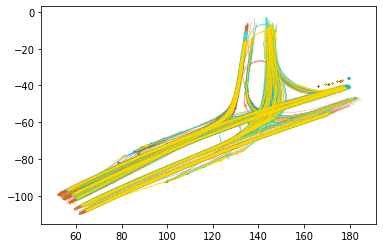

In [28]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_1"]["ids"], inD_vehicles)

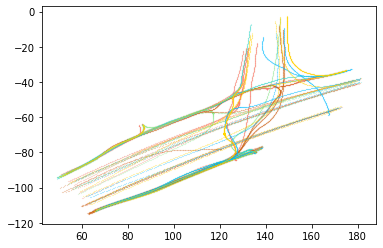

In [29]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_1"]["ids"], inD_bikes)

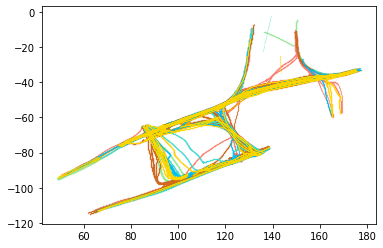

In [30]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_1"]["ids"], inD_pedestrians)

### InD_2

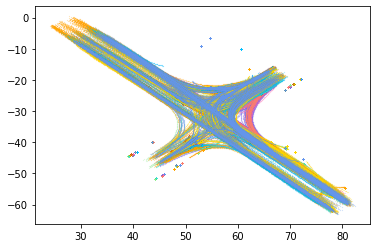

In [31]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_2"]["ids"], inD_vehicles)

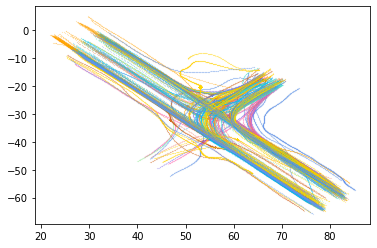

In [32]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_2"]["ids"], inD_bikes)

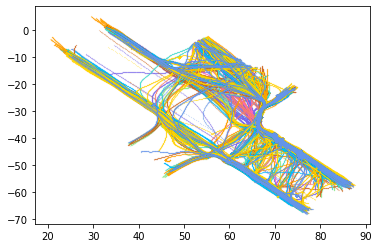

In [33]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_2"]["ids"], inD_pedestrians)

### InD_3

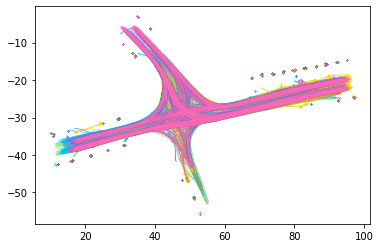

In [34]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_3"]["ids"], inD_vehicles)

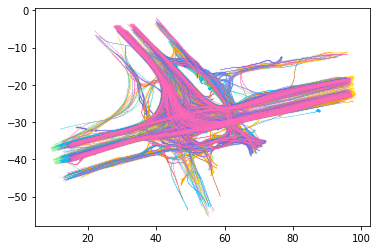

In [35]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_3"]["ids"], inD_bikes)

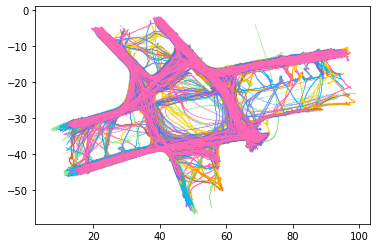

In [36]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_3"]["ids"], inD_pedestrians)

### InD_4

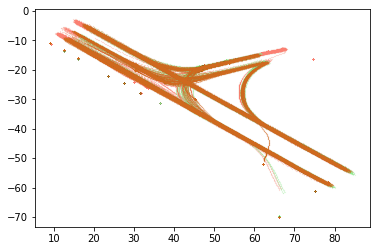

In [37]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_4"]["ids"], inD_vehicles)

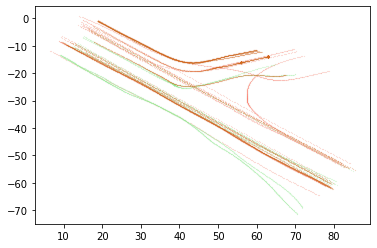

In [38]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_4"]["ids"], inD_bikes)

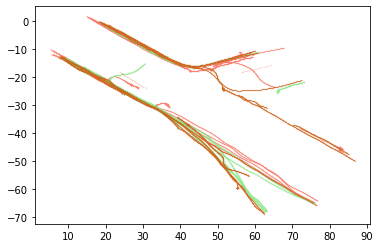

In [39]:
visualize_trajectory(inD_folder, inD_column, inD_config["inD_4"]["ids"], inD_pedestrians)

## RounD dataset

In [40]:
rounD_folder = "/data/HighD/rounD/data"
with open("./rounD.config") as rounD_json:
    rounD_config = json.load(rounD_json)
rounD_column = {"x": "xCenter", "y": "yCenter", "id": "trackId"}
rounD_vehicles = ["car", "bus", "truck", "van", "trailer"]
rounD_cycles = ["motorcycle", "bicycle"]
rounD_pedestrians = ["pedestrian"]

### RounD_1

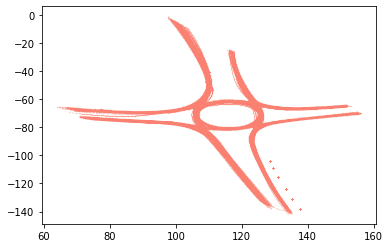

In [41]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_1"]["ids"], rounD_vehicles)

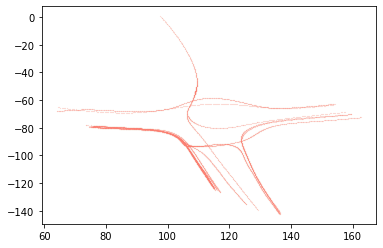

In [42]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_1"]["ids"], rounD_cycles)

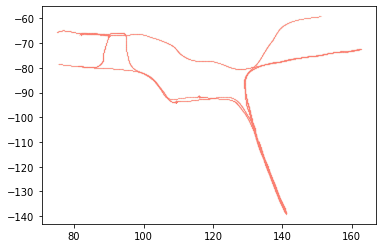

In [43]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_1"]["ids"], rounD_pedestrians)

### RounD_2

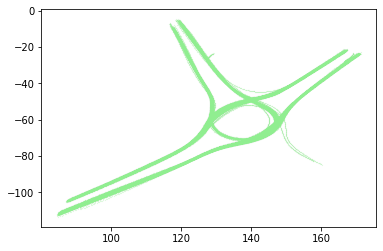

In [44]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_2"]["ids"], rounD_vehicles)

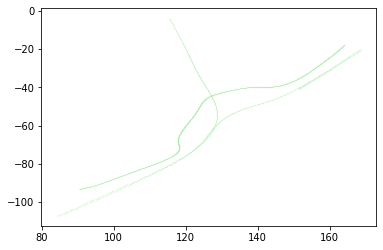

In [45]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_2"]["ids"], rounD_cycles)

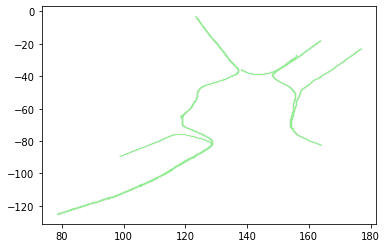

In [46]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_2"]["ids"], rounD_pedestrians)

### RounD_3

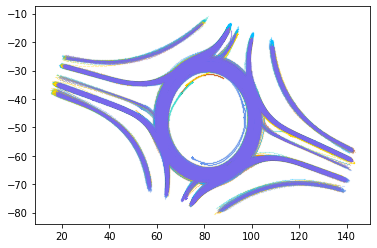

In [47]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_3"]["ids"], rounD_vehicles)

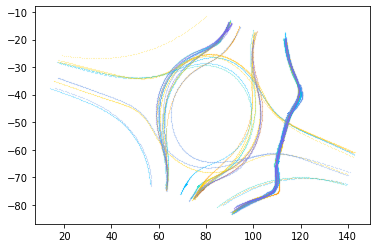

In [48]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_3"]["ids"], rounD_cycles)

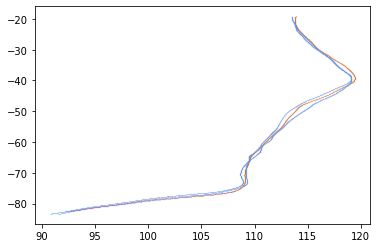

In [49]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_3"]["ids"], rounD_pedestrians)

### RounD_4

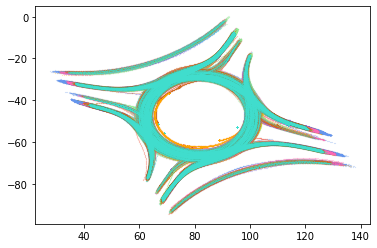

In [50]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_4"]["ids"], rounD_vehicles)

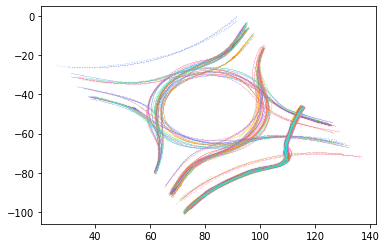

In [51]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_4"]["ids"], rounD_cycles)

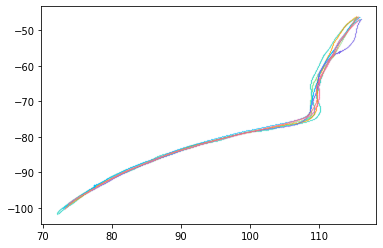

In [52]:
visualize_trajectory(rounD_folder, rounD_column, rounD_config["rounD_4"]["ids"], rounD_pedestrians)